# Error Analysis for NN model

This file contains the code for error analysis of the NN model. Our goal is to figure out what the model is doing wrong and why it is doing it wrong.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

OUTPUT_DIR = '../results/bart_baseline_50w/'
MODEL_OUTPUT_NAME = 'predict_output.json'
DATASET_DIR = '../data/ChID/'
TRAIN_SET_NAME = 'train_data_50w.json'

# eliminate empty characters in output file
# with open(OUTPUT_DIR + MODEL_OUTPUT_NAME, 'r') as f:
#     f_str = f.read()
# f_str = f_str.replace(' ', '')


output_df = pd.read_json(f"{OUTPUT_DIR}{MODEL_OUTPUT_NAME}")
dataset = []
with open(DATASET_DIR + TRAIN_SET_NAME, 'r') as f:
    for line in f:
        dataset.append(json.loads(line))

In [9]:
output_df

,pred,label,input
0,现身说法,现身说法,只要路过的旅客稍有迟疑，或者对他们的宣传单多看几眼，基本上这个旅客就别想轻松脱身了，记者就在...
1,神来之笔,神来之笔,亨利的这个[MASK]被法国媒体形容为“空中舞蹈”，亨利自己对球队表现也很满意，“上半场开局...
2,赞不绝口,赞不绝口,亨利的这个#idiom#被法国媒体形容为“空中舞蹈”，亨利自己对球队表现也很满意，“上半场开...
3,难分难舍,难分难舍,置，也是随后六年中唯一的一次中秋。临别时，二人[MASK]，子由决定送兄长至颖河下游八十里外...
4,先天不足,先天不足,（业余爱好者）这个词的另一个而且是更为普及的意义是，一个人对其工作不够严肃，他不仅不足以完全...
...,...,...,...
24943,争风吃醋,争风吃醋,abc电视台的《单身汉》则让一位单身汉在25位候选女子中选一位向她求婚。该单身汉必须#idi...
24944,半壁江山,半壁江山,天相统计数据显示，截至12月24日，今年以来共有35只债券型基金结束募集，募集总规模突破千亿...
24945,兴高采烈,兴高采烈,众人推推操操的，[MASK]，排成大队，呼喊口号。“好日子在哪儿呀？”他不由得跟著问。“好日...
24946,朴实无华,朴实无华,张艺谋：我自己认为如果说清新，我们希望这个电影有一种纯真和清新感的话，我觉得要用新人。不是其...


In [10]:
dataset

[{'groundTruth': ['发扬光大', '平易近人', '温文尔雅'],
  'candidates': [['意气风发', '街谈巷议', '人才辈出', '一脉相传', '后继有人', '发扬光大', '腥风血雨'],
   ['平易近人', '落落大方', '八仙过海', '彬彬有礼', '史无前例', '盛气凌人', '好自为之'],
   ['不拘小节', '风流潇洒', '无病呻吟', '言谈举止', '壮志凌云', '关门闭户', '温文尔雅']],
  'content': '由实力派演员刘威饰演的清华第三任校长蒋南翔，是我国著名的青年运动家和教育家，他跟清华终身校长梅贻琦一样，都是由清华人自己培养出来的校长。历史上的蒋南翔是著名的“一二九”学生救亡运动的领导人之一，他在清华校长之位14年期间，不但很好的继承了清华建校之初的优秀传统与理念，而且更加的#idiom#，他把清华的教师队伍扩大了将近5倍，将清华本科人数破万，为新中国培养了大量的有用人才。在《天行健》中饰演蒋南翔的刘威是观众所熟悉的著名实力派演员，早在1987年刘威就在《关东大侠》中饰演豪爽仗义的关云天一角而获得了金鸡奖最佳男主角的提名，后来更是因在《唐明皇》中精湛的表演而一举夺得金鹰奖最佳男演员奖。此次《天行健》选定刘威来出演正是看中了他#idiom#的表演方式和对人物深入内心的刻画。至此，《天行健》中涉及的三位清华校长的人选都已经曝光，#idiom#的第一任校长赵文?、稳重坚毅的第二任校长孙逊、亲切务实的第三任校长刘威，再加上梁思成、林徽因、朱自清、闻一多等一批“大师”的加盟，相信作为清华百年校庆重点项目之一的《天行健》一定会带领观众重温那段不能抹去的历史。',
  'realCount': 3},
 {'groundTruth': ['肥头大耳'],
  'candidates': [['超凡入圣', '骨瘦如柴', '青面獠牙', '虎背熊腰', '成人之美', '肥头大耳', '神不守舍']],
  'content': '#idiom#的掌柜只穿一件衬衫，坐在柜台里。几个堂倌穿着脏得发黑的白工作服，因为没有顾客，都散坐在桌子旁。这当儿看到这位不寻常的客人，都露出好奇的神色列宁曾批评他理论上的错误，同时认为他“所写的全部哲学，赶紧迎上前来伺候。聂赫留朵夫要了一瓶矿泉水，

## Part 0 - Statistics

We show the statistics of the datasets.

In [29]:
import os
import json
from utils import dataset_stat

# print the summary of each dataset 
for file in os.listdir(DATASET_DIR):
    if file.endswith('.json'):
        dataset_stat(DATASET_DIR + file)

summary for dataset: ../dataset/test_data.json
total_num:  20000
idoim_lengths: 
count    199584.0
mean          4.0
std           0.0
min           4.0
25%           4.0
50%           4.0
75%           4.0
max           4.0
dtype: float64
candidates_nums: 
count    24948.0
mean         7.0
std          0.0
min          7.0
25%          7.0
50%          7.0
75%          7.0
max          7.0
dtype: float64
blank_nums: 
count    20000.000000
mean         1.247400
std          0.583018
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
dtype: float64

summary for dataset: ../dataset/idiom-dict2.json
total_num:  3820
idoim_lengths: 
count    30560.0
mean         4.0
std          0.0
min          4.0
25%          4.0
50%          4.0
75%          4.0
max          4.0
dtype: float64
candidates_nums: 
count    3820.0
mean        7.0
std         0.0
min         7.0
25%         7.0
50%         7.0
75%         7.0
max         7.0
dtype: 

## Part I - Error Frequency Analysis

Intuitively, if an idiom appears rear in the training set, it is more likely to be misclassified. If such an intuition is true, a scatter plot of the frequency of an idiom in the training set and the frequency of misclassification of the idiom should show a positive correlation. 

In [11]:
# get all idioms in the dataset
idioms_in_train = []
for data in dataset:
    for cands in data['candidates']:
        idioms_in_train.extend(cands)

idioms_in_train_dict = set(idioms_in_train)

# get all idioms in the output
idioms_in_output_dict = output_df['label'].to_list()
idioms_in_output_dict.extend(output_df['pred'].to_list())
idioms_in_output_dict = set(idioms_in_output_dict)

In [12]:
# check whether two sets interect
idioms_in_train_dict.intersection(idioms_in_output_dict)

{'身心交病',
 '揠苗助长',
 '徒子徒孙',
 '一如既往',
 '文房四宝',
 '地老天荒',
 '扶摇直上',
 '后台老板',
 '巧夺天工',
 '执迷不悟',
 '所向披靡',
 '热火朝天',
 '湖光山色',
 '千恩万谢',
 '朴实无华',
 '中西合璧',
 '打成一片',
 '打情骂俏',
 '好大喜功',
 '额手称庆',
 '失魂落魄',
 '发愤图强',
 '通风报信',
 '随机应变',
 '三番五次',
 '四平八稳',
 '七零八落',
 '钦差大臣',
 '直抒胸臆',
 '后发制人',
 '风和日丽',
 '甚嚣尘上',
 '出其不意',
 '三顾草庐',
 '短小精悍',
 '万紫千红',
 '仁义道德',
 '落花流水',
 '人命关天',
 '轻装上阵',
 '过河拆桥',
 '急风骤雨',
 '三头六臂',
 '心平气和',
 '自我解嘲',
 '是非曲直',
 '人心不古',
 '若有若无',
 '火眼金睛',
 '汹涌澎湃',
 '苦尽甘来',
 '怒火冲天',
 '百战百胜',
 '名列前茅',
 '名实相副',
 '玩物丧志',
 '画龙点睛',
 '敬而远之',
 '作壁上观',
 '推陈致新',
 '畏缩不前',
 '朝令夕改',
 '丑态百出',
 '殚思极虑',
 '无关紧要',
 '身不由己',
 '盘根错节',
 '自成一格',
 '一场春梦',
 '一臂之力',
 '谈何容易',
 '授人以柄',
 '细枝末节',
 '日积月累',
 '一语破的',
 '纸醉金迷',
 '苦口婆心',
 '土崩瓦解',
 '黯然失色',
 '自行其是',
 '翻云覆雨',
 '抱头鼠窜',
 '触类旁通',
 '七老八十',
 '讨价还价',
 '行色匆匆',
 '一刀两断',
 '骄傲自满',
 '无能为力',
 '言之无物',
 '不堪入目',
 '迫不得已',
 '临阵脱逃',
 '气贯长虹',
 '酸甜苦辣',
 '摇摇摆摆',
 '心安理得',
 '风流倜傥',
 '四面受敌',
 '寻花问柳',
 '顽固不化',
 '浑然一体',
 '鹿死谁手',
 '得不偿失',
 '独立自主',
 '五花大绑',
 '一锤定音',
 '手足失措',
 '悔不当初',
 '磨刀霍霍',
 '发号施令',
 

In [13]:
# get the negative samples
neg_results = output_df[output_df['label'] != output_df['pred']]
pd.set_option('display.max_rows', None)
neg_results

,pred,label,input
88,一统天下,雄心壮志,从包产到户到[MASK]我喜欢跟一批人干活，不喜欢一个人干。创业初期，环顾周围的老师和工作人...
197,小心翼翼,郑重其事,马李#idiom#地安慰她。“别怕!他不会来的!再也不会来了!没事了，别害怕!”他听着自己的...
213,源远流长,一衣带水,穿戴[UNK]亮铠甲的奥诺兰朝着全爱琳这个位高势大的首领深打一躬，禀明了事情的原委。这座无比...
304,十万火急,火烧眉毛,“可眼前碰上[MASK]的事。”他犹豫了一个晚上，第二天早晨爬起床就去找老张。没多久，他拿着...
310,一飞冲天,时来运转,在香港，maggieq[MASK]。1.7米的个头对t台来说显得太矮，但在平媒上却成了强项。...
...,...,...,...
24559,单枪匹马,赤手空拳,的[MASK]就能把一艘三桅战舰的绞盘转动，把主锚拉上来。”虽然这样，他一边挑剔，一边还是在...
24651,冥顽不灵,不可理喻,只有这一个人老是一再地在一个地方浮现出来，因此我就发现了他。宛如拍岸浪头有时以一种[MASK...
24693,稳如泰山,四平八稳,些女人希望在《纽约客》上发表什么。他[MASK]，随随便便的。他坐在你旁边，跟你淡政治，然后...
24707,心不在焉,无精打彩,“是的，先生[UNK][UNK]凡是我们目前所能做的一切需要全都有了。我找来了墨航在这里的大...


In [63]:
true_idioms = neg_results['label'].to_list()
all_labels = output_df['label'].to_list()
wrong_idioms = neg_results['pred'].to_list()
all_preds = output_df['pred'].to_list()
# create a dataframe with frequency of each idiom in trainset, wrong_idioms and true_idioms
idiom_freq = pd.DataFrame({'idiom': idioms_in_train})
idiom_freq['freq'] = idiom_freq.groupby('idiom')['idiom'].transform('count')
idiom_freq = idiom_freq.drop_duplicates()
idiom_freq = idiom_freq.sort_values(by='freq', ascending=False)
# wrong_freq: for each idiom appears in testset, how many frequent it is predicted wrong
idiom_freq['wrong_freq'] = idiom_freq['idiom'].apply(
    lambda x: wrong_idioms.count(x)/max(all_preds.count(x), 1))
# true_freq: for each idiom appears in testset, how many frequent it is predicted right
idiom_freq['true_freq'] = idiom_freq['idiom'].apply(
    lambda x: true_idioms.count(x)/max(all_labels.count(x), 1))


In [64]:
# pd.set_option('display.max_rows', 10)
idiom_freq

,idiom,freq,wrong_freq,true_freq
1527,如日中天,4398,0.000000,0.000000
300,失魂落魄,4288,0.000000,0.000000
356,独树一帜,3778,0.041667,0.000000
780,首屈一指,3591,0.000000,0.058824
43,层出不穷,3550,0.000000,0.000000
...,...,...,...,...
51244,文房四宝,496,0.000000,0.333333
848,握手言欢,493,0.000000,0.000000
6805,有头有尾,493,0.000000,0.000000
11486,掐头去尾,484,0.000000,0.000000


<AxesSubplot: >

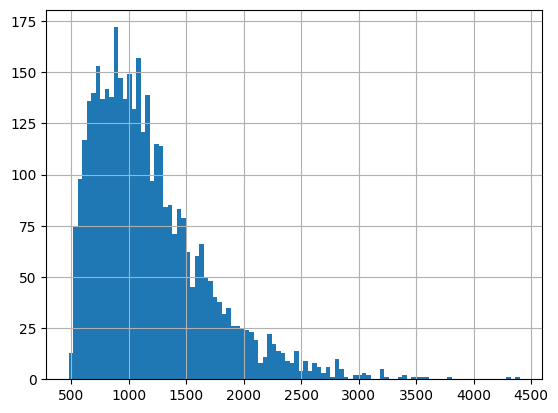

In [61]:
# histogram of freq
idiom_freq['freq'].hist(bins=100)

In [65]:
idiom_freq.sort_values(by='wrong_freq', ascending=False)


,idiom,freq,wrong_freq,true_freq
574,红颜薄命,710,1.0,0.000000
23606,大红大绿,653,1.0,0.000000
17347,见异思迁,717,1.0,0.000000
13561,奉公如法,788,1.0,0.000000
4403,图谋不轨,1488,1.0,0.000000
...,...,...,...,...
1704,打抱不平,1229,0.0,0.000000
931,像模像样,1228,0.0,0.000000
1624,繁荣昌盛,1227,0.0,0.200000
5592,智勇双全,1227,0.0,0.333333


In [66]:
idiom_freq.sort_values(by='true_freq', ascending=False)

,idiom,freq,wrong_freq,true_freq
8224,无所不至,823,0.0,1.0
10768,心神恍惚,1157,1.0,1.0
284,手足失措,906,0.0,1.0
312,自愧弗如,1432,0.0,1.0
913,无牵无挂,1181,0.0,1.0
...,...,...,...,...
660,若有若无,1238,0.0,0.0
394,何去何从,1238,0.0,0.0
4737,衣冠楚楚,1237,0.0,0.0
2843,有板有眼,1237,0.1,0.0


In [68]:
# get the idiom with positive wrong_freq
wrong_merge = idiom_freq[idiom_freq['wrong_freq'] > 0]

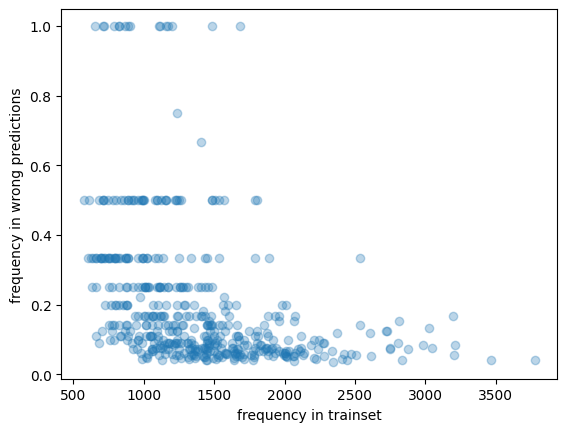

In [70]:
# draw the scatter plot of the frequency of idioms in trainset, wrong_idioms
plt.scatter(wrong_merge['freq'], wrong_merge['wrong_freq'], alpha=0.3)
plt.xlabel('frequency in trainset')
plt.ylabel('frequency in wrong predictions')
plt.show()


In [71]:
# get the idiom with positive true_freq
true_merge = idiom_freq[idiom_freq['true_freq'] > 0]

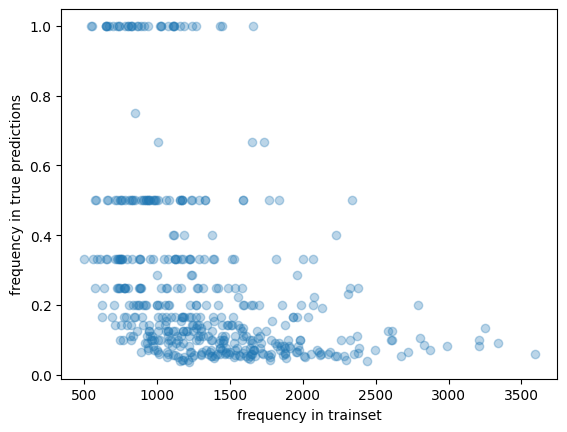

In [72]:
# draw the scatter plot of the frequency of idioms in trainset, true_idioms
plt.scatter(true_merge['freq'], true_merge['true_freq'], alpha=0.3)
plt.xlabel('frequency in trainset')
plt.ylabel('frequency in true predictions')
plt.show()

It seems that all misclassified idioms do not appear in the training set. This is not surprising because the training set is very small.

On the other hand, we can also test whether correct classification of an idiom is correlated with the frequency of the idiom in the training set.


In [45]:
# get the positive results
pos_results = output_df[output_df['pred']==output_df['label']]

pos_results

,pred,label,input
0,现身说法,现身说法,[CLS]只要路过的旅客稍有迟疑，或者对他们的宣传单多看几眼，基本上这个旅客就别想轻松脱身了...
1,神来之笔,神来之笔,[CLS]亨利的这个[MASK]被法国媒体形容为[UNK]空中舞蹈[UNK]，亨利自己对球队...
2,赞不绝口,赞不绝口,[CLS]亨利的这个#idiom#被法国媒体形容为[UNK]空中舞蹈[UNK]，亨利自己对球...
3,难分难舍,难分难舍,[CLS]置，也是随后六年中唯一的一次中秋。临别时，二人[MASK]，子由决定送兄长至颖河下...
4,先天不足,先天不足,[CLS]（业余爱好者）这个词的另一个而且是更为普及的意义是，一个人对其工作不够严肃，他不仅...
...,...,...,...
24943,争风吃醋,争风吃醋,[CLS]abc电视台的《单身汉》则让一位单身汉在25位候选女子中选一位向她求婚。该单身汉必...
24944,半壁江山,半壁江山,[CLS]天相统计数据显示，截至12月24日，今年以来共有35只债券型基金结束募集，募集总规...
24945,兴高采烈,兴高采烈,[CLS]众人推推操操的，[MASK]，排成大队，呼喊口号。[UNK]好日子在哪儿呀？[UN...
24946,朴实无华,朴实无华,[CLS]张艺谋：我自己认为如果说清新，我们希望这个电影有一种纯真和清新感的话，我觉得要用新...


In [46]:
# get correct idioms
correct_idioms = pos_results['pred']

# create a dataframe with frequency of each idiom in trainset, correct_idioms
correct_freq = pd.DataFrame({'idiom': correct_idioms})
correct_freq['freq'] = correct_freq.groupby('idiom')['idiom'].transform('count')
correct_freq = correct_freq.drop_duplicates()
correct_freq = correct_freq.sort_values(by='freq', ascending=False)

correct_freq

,idiom,freq
1966,无能为力,30
294,岌岌可危,27
57,无独有偶,27
669,素不相识,27
1158,五色缤纷,26
...,...,...
3327,近亲繁殖,1
12582,恃强凌弱,1
12583,月黑风高,1
12586,芒刺在背,1


In [47]:
# merge the three dataframes with inner join
correct_merge = idiom_freq.merge(correct_freq, on='idiom', how='inner')
correct_merge

,idiom,freq_x,freq_y
0,如日中天,4398,6
1,失魂落魄,4288,6
2,独树一帜,3778,23
3,首屈一指,3591,16
4,层出不穷,3550,13
...,...,...,...
3440,金石为开,503,1
3441,天王老子,499,2
3442,文房四宝,496,2
3443,握手言欢,493,2


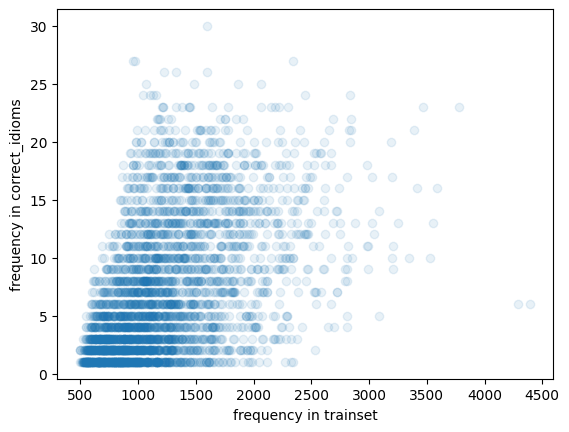

In [49]:
# draw the scatter plot of the frequency of idioms in trainset, correct_idioms
plt.scatter(correct_merge['freq_x'], correct_merge['freq_y'], alpha=0.1)
plt.xlabel('frequency in trainset')
plt.ylabel('frequency in correct_idioms')
plt.show()